<img src='Cover5-01.png'>

# Семинар 5. Прогнозирование цен на недвижимость. 

## Импорт и предварительный анализ данных

In [79]:
# Импортируем необходимые библиотеки
import json
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Импортируем файл с данными, выгруженными с t-s.by и преобразовываем его в Pandas DataFrame:
with open('result.json', encoding="utf8") as data_file:    
    data = json.load(data_file)
    
df = pd.io.json.json_normalize(data)

In [3]:
# Изменяем максимальное кол-во отображаемых строк и столбцов:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 25)

In [4]:
# Кол-во записей и кол-во признаков:
df.shape

(410, 20)

In [5]:
# Шапка датафрейма:
df.head()

,Адрес,Балкон,Ближайшее метро,Год капитального ремонта,Год постройки,Город,Код объекта,Комнаты,Материал стен,Микрорайон,Описание,Площади,Полы,Район,Санузел,Телефон,Тип дома,Условия продажи,Цена,Этаж / Этажность
0,"Ташкентская ул., 24 корпус 3",лоджия застекленная,NaN,0,1977,Минск,818272,3,блок-комнаты,Чижовка,Комната в трехкомнатной квартире в микрорайоне...,71.4 / 13.95 / 9.16,линолеум,Заводской район,раздельный,есть,стандартные,чистая продажа,15 500 у. е.,2/9
1,"Ауэзова ул., 12",NaN,NaN,0,1970,Минск,846050,1/2,панельный,Чижовка,Комната в малонаселенной (соседи семья без дет...,49.9 / 17.2 / 6.2,линолеум,Заводской район,раздельный,нет,брежневка,чистая продажа,17 500 у. е. (351 у. е./м,5/5
2,"Карла Либкнехта ул., 77",NaN,NaN,0,1957,Минск,822608,3,кирпичный,"Р.Люксембург, К.Либкнехта",Две комнаты в трехкомнатной квартире. Стеклопа...,61.2 / 30.5 / 6.7,линолеум,Московский район,раздельный,нет,сталинка,NaN,27 000 у. е.,1/3
3,"Радужная ул., 17",лоджия застекленная,NaN,0,2016,Дзержинск,816689,1/1,панельный,NaN,Новостройка 2016 г.п. без отделки. Входная мет...,43.6 / 20 / 10.4,NaN,Пригород,раздельный,нет,новостройка,чистая продажа,25 500 у. е. (585 у. е./м,1/5
4,"Протасова ул., 7",балкон,NaN,0,1976,Дзержинск,837634,1/1,кирпичный,NaN,Квартира улучшенной планировки в кирпичном дом...,35.2 / 19.1 / 7.9,деревянные,Пригород,раздельный,нет,брежневка,чистая продажа,19 900 у. е. (565 у. е./м,1/2


In [6]:
# В качестве индекса используем 'Код объекта', а сам столбец - удаляем:
df.index = df['Код объекта'].apply(pd.to_numeric)
del df['Код объекта']

In [7]:
df.head()

,Адрес,Балкон,Ближайшее метро,Год капитального ремонта,Год постройки,Город,Комнаты,Материал стен,Микрорайон,Описание,Площади,Полы,Район,Санузел,Телефон,Тип дома,Условия продажи,Цена,Этаж / Этажность
Код объекта,,,,,,,,,,,,,,,,,,,
818272,"Ташкентская ул., 24 корпус 3",лоджия застекленная,NaN,0,1977,Минск,3,блок-комнаты,Чижовка,Комната в трехкомнатной квартире в микрорайоне...,71.4 / 13.95 / 9.16,линолеум,Заводской район,раздельный,есть,стандартные,чистая продажа,15 500 у. е.,2/9
846050,"Ауэзова ул., 12",NaN,NaN,0,1970,Минск,1/2,панельный,Чижовка,Комната в малонаселенной (соседи семья без дет...,49.9 / 17.2 / 6.2,линолеум,Заводской район,раздельный,нет,брежневка,чистая продажа,17 500 у. е. (351 у. е./м,5/5
822608,"Карла Либкнехта ул., 77",NaN,NaN,0,1957,Минск,3,кирпичный,"Р.Люксембург, К.Либкнехта",Две комнаты в трехкомнатной квартире. Стеклопа...,61.2 / 30.5 / 6.7,линолеум,Московский район,раздельный,нет,сталинка,NaN,27 000 у. е.,1/3
816689,"Радужная ул., 17",лоджия застекленная,NaN,0,2016,Дзержинск,1/1,панельный,NaN,Новостройка 2016 г.п. без отделки. Входная мет...,43.6 / 20 / 10.4,NaN,Пригород,раздельный,нет,новостройка,чистая продажа,25 500 у. е. (585 у. е./м,1/5
837634,"Протасова ул., 7",балкон,NaN,0,1976,Дзержинск,1/1,кирпичный,NaN,Квартира улучшенной планировки в кирпичном дом...,35.2 / 19.1 / 7.9,деревянные,Пригород,раздельный,нет,брежневка,чистая продажа,19 900 у. е. (565 у. е./м,1/2


In [8]:
# Теперь можем получать все данные по коду квартиры
df.loc[818272]

Адрес                                            Ташкентская ул., 24 корпус 3
Балкон                                                    лоджия застекленная
Ближайшее метро                                                           NaN
Год капитального ремонта                                                    0
Год постройки                                                            1977
Город                                                                   Минск
Комнаты                                                                     3
Материал стен                                                    блок-комнаты
Микрорайон                                                            Чижовка
Описание                    Комната в трехкомнатной квартире в микрорайоне...
Площади                                                   71.4 / 13.95 / 9.16
Полы                                                                 линолеум
Район                                                         За

In [9]:
# Или только нужную их часть:
df.loc[818272][{'Адрес', 'Цена', 'Этаж / Этажность'}]

Этаж / Этажность                             2/9
Адрес               Ташкентская ул., 24 корпус 3
Цена                               15 500 у. е. 
Name: 818272, dtype: object

Это полезно, потому что в силу устройства сайта t-s.by код квартиры учавствует в url:

http://www.t-s.by/buy/flats/818272/

поэтому при необходимости можно быстро посмотреть детали заинтересовавшей квартиры в браузере

In [10]:
# Названия столбцов:
df.columns

Index(['Адрес', 'Балкон', 'Ближайшее метро', 'Год капитального ремонта',
       'Год постройки', 'Город', 'Комнаты', 'Материал стен', 'Микрорайон',
       'Описание', 'Площади', 'Полы', 'Район', 'Санузел', 'Телефон',
       'Тип дома', 'Условия продажи', 'Цена', 'Этаж / Этажность'],
      dtype='object')

In [11]:
# Частотное распределение значений в столбце 'Город':
df['Город'].value_counts()[:10]

Минск          354
Лесной           8
Прилуки          6
Заславль         6
Дзержинск        6
Фаниполь         4
Боровляны        4
Михановичи       3
Радошковичи      2
Солнечный        1
Name: Город, dtype: int64

In [12]:
# Поскольку исследование проводится для Минска, оставим только эти записи:
df = df[df['Город'] == 'Минск']
del df['Город']

In [13]:
# Выведем сводную информацию:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 818272 to 835358
Data columns (total 18 columns):
Адрес                       354 non-null object
Балкон                      318 non-null object
Ближайшее метро             198 non-null object
Год капитального ремонта    354 non-null object
Год постройки               354 non-null object
Комнаты                     354 non-null object
Материал стен               354 non-null object
Микрорайон                  308 non-null object
Описание                    351 non-null object
Площади                     354 non-null object
Полы                        306 non-null object
Район                       354 non-null object
Санузел                     353 non-null object
Телефон                     354 non-null object
Тип дома                    255 non-null object
Условия продажи             301 non-null object
Цена                        354 non-null object
Этаж / Этажность            353 non-null object
dtypes: object(18)
memo

## Разбираемся с пропусками

Некоторые столбцы не будут участвовать в конечной модели, но не удаляем их раньше времени

###  Описание
В итоговой модели этот столбец использоваться не будет, решено полагаться на реальные параметры квартиры, а не ее субъективное описание владельцем/риелтором

### Адрес
Содержит название улицы и номер дома, в итоговой модели также не используется, локация влиять на цену будет посредством столбцов 'Район' и 'Микрорайон'

### Балкон

In [14]:
df['Балкон'].fillna('нету', inplace=True)
df['Балкон'].value_counts()

лоджия застекленная              167
балкон застекленный               62
2 лоджии застекленные             37
нету                              36
балкон                            28
лоджия                             8
2 балкона застекленные             5
2 лоджии                           3
лоджия застекленная + вагонка      3
3лз                                3
3л                                 1
балкон застекленный + вагонка      1
Name: Балкон, dtype: int64

In [15]:
def common_converter(mapping, param):
    if param in mapping:
        return mapping[param]
    return param

balcony_mapping = {
        'балкон застекленный':'балкон',
        'лоджия застекленная':'лоджия',
        'лоджия застекленная + вагонка':'лоджия',
        'балкон застекленный + вагонка':'балкон',
        '2 балкона застекленные':'2 балкона',
        '2 лоджии застекленные':'2 лоджии',
        '3лз':'3 лоджии',
        '3л':'3 лоджии'        
    }

df['Балкон'] = df['Балкон'].map(lambda x: common_converter(balcony_mapping, x))
df['Балкон'].value_counts()

лоджия       178
балкон        91
2 лоджии      40
нету          36
2 балкона      5
3 лоджии       4
Name: Балкон, dtype: int64

### Ближайшее метро

In [16]:
df['Ближайшее метро'].value_counts()

Уручье                       22
Каменная горка               21
Грушевка                     18
Кунцевщина                   16
Академия наук                13
Могилевская                  10
Спортивная                   10
Победы пл.                   10
Малиновка                    10
Якуба Коласа пл.              9
Автозаводская                 6
Восток                        6
                             ..
Пушкинская                    5
Петровщина                    5
Парк Челюскинцев              4
Молодежная                    4
Пролетарская                  3
Московская                    3
Купаловская (Октябрьская)     3
Первомайская                  2
Фрунзенская                   2
Михалово                      2
Тракторный завод              2
Немига                        1
Name: Ближайшее метро, Length: 26, dtype: int64

In [17]:
df['Ближайшее метро'].fillna('нету', inplace=True)
df['Ближайшее метро'].value_counts()

нету                         156
Уручье                        22
Каменная горка                21
Грушевка                      18
Кунцевщина                    16
Академия наук                 13
Могилевская                   10
Спортивная                    10
Победы пл.                    10
Малиновка                     10
Якуба Коласа пл.               9
Автозаводская                  6
                            ... 
Пушкинская                     5
Партизанская                   5
Молодежная                     4
Парк Челюскинцев               4
Пролетарская                   3
Купаловская (Октябрьская)      3
Московская                     3
Тракторный завод               2
Первомайская                   2
Фрунзенская                    2
Михалово                       2
Немига                         1
Name: Ближайшее метро, Length: 27, dtype: int64

Закономерно: в Уручье и Грушевке много новостроек, а в районе Каменной горки и Кунцевщины не так давно строилось много льготного жилья, которое продают теперь уже нельготники :)

### Год постройки и Год капитального ремонта

In [18]:
import datetime

In [19]:
# Вместо данных столбцов введем другие: 'Лет дому' и 'Лет с последнего ремонта':

df['Год постройки'] = df['Год постройки'].apply(pd.to_numeric)
df['Год капитального ремонта'] = df['Год капитального ремонта'].apply(pd.to_numeric)

current_year = datetime.datetime.now().year

def years_from_last_repair(row):
    if row['Год капитального ремонта'] == 0:
        row['Год капитального ремонта'] = row['Год постройки']
    return current_year - row['Год капитального ремонта']

df['Лет дому'] = df['Год постройки'].map(lambda x: current_year - x)
df['Лет с момента ремонта'] = df.apply(lambda row: years_from_last_repair(row), axis=1)
df['Был капремонт'] = df['Год капитального ремонта']!=0

# Исходные два столбца удаляем:
df.drop({'Год постройки', 'Год капитального ремонта'}, axis=1, inplace=True)

### Комнаты

In [20]:
df['Комнаты'].value_counts()

1/1    106
2/2    101
3/3     85
4/4     14
3/2     11
3/1      9
2/1      7
2        6
3        4
4/1      3
4        2
4/3      2
4/2      1
1/2      1
6/6      1
5/5      1
Name: Комнаты, dtype: int64

Если в этом столбце первое число меньше второго - есть подозрение на то, что это продается комната, а не квартира. Проверим это: 

In [21]:
df[df['Комнаты'] == '1/2']

,Адрес,Балкон,Ближайшее метро,Комнаты,Материал стен,Микрорайон,Описание,Площади,Полы,Район,Санузел,Телефон,Тип дома,Условия продажи,Цена,Этаж / Этажность,Лет дому,Лет с момента ремонта,Был капремонт
Код объекта,,,,,,,,,,,,,,,,,,,
846050,"Ауэзова ул., 12",нету,нету,1/2,панельный,Чижовка,Комната в малонаселенной (соседи семья без дет...,49.9 / 17.2 / 6.2,линолеум,Заводской район,раздельный,нет,брежневка,чистая продажа,17 500 у. е. (351 у. е./м,5/5,48,48,False


\- действительно комната. Отбрасываем такие записи:

In [22]:
df = df[df['Комнаты'] != '1/2']

In [23]:
# Выделяем кол-во комнат:

df['Комнаты'] = df['Комнаты'].map(lambda x: x if x.find('/') == -1 else x.split('/')[0])
df['Комнаты'] = df['Комнаты'].apply(pd.to_numeric)
df['Комнаты'].value_counts()

2    114
3    109
1    106
4     22
6      1
5      1
Name: Комнаты, dtype: int64

\- больше всего продается 2,3,1-комнатных

In [24]:
# Среднее кол-во комнат:
np.mean(df['Комнаты'])

2.1529745042492916

### Материал стен

In [25]:
df['Материал стен'].value_counts()

панельный            160
кирпичный            100
каркасно-блочный      37
блок-комнаты          21
силикатно-блочный     19
монолитный            16
Name: Материал стен, dtype: int64

\- здесь все в порядке, пропусков нет

### Район и Микрорайон

In [26]:
df['Район'].value_counts()

Фрунзенский район     85
Первомайский район    55
Московский район      52
Ленинский район       36
Заводской район       34
Советский район       28
Центральный район     26
Октябрьский район     21
Партизанский район    16
Name: Район, dtype: int64

\- указан у всех записей

In [27]:
df['Микрорайон'].value_counts()

Уручье                                                     18
Малиновка                                                  18
Серебрянка                                                 17
Сухарево                                                   17
Р.Люксембург, К.Либкнехта                                  15
Кунцевщина                                                 13
Ангарская                                                  11
Чижовка                                                    10
Червякова, Шевченко                                        10
Масюковщина                                                 9
Пушкина, Глебки, Притыцкого, Ольшевского, Кальварийская     9
Каменная горка                                              9
                                                           ..
Дзержинского, Хмелевского, Щорса                            2
Тракторный Завод                                            2
Победителей, Заславская                                     2
Кижевато

In [28]:
# Заменим пропущенные значения строкой 'Не указан':
df['Микрорайон'].fillna('Не указан', inplace=True)

### Площади

In [29]:
df['Общая площадь'] = df['Площади'].map(lambda x: float(x.split(' / ')[0]))
df['Жилая площадь'] = df['Площади'].map(lambda x: float(x.split(' / ')[1]))
df['Площадь кухни'] = df['Площади'].map(lambda x: float(x.split(' / ')[2]))

# Удаляем столбец 'Площади':
df = df.drop('Площади', axis=1)

In [30]:
# Среднияя площадь типичной квартиры на рынке
np.mean(df['Общая площадь']), np.mean(df['Жилая площадь']), np.mean(df['Площадь кухни'])

(60.667620396600562, 35.148073654390934, 8.7111614730878184)

### Полы

In [31]:
df['Полы'].value_counts()

ламинированые        105
линолеум             104
паркет                55
деревянные            36
ДСП                    3
ковровое покрытие      2
Name: Полы, dtype: int64

In [32]:
df['Полы'].fillna('Не указано', inplace=True)

### Санузел

In [33]:
df['Санузел'].value_counts()

раздельный     252
совмещенный     84
2 сан.узла      15
3 сан.узла       1
Name: Санузел, dtype: int64

In [34]:
df[df['Санузел'].isnull()]

,Адрес,Балкон,Ближайшее метро,Комнаты,Материал стен,Микрорайон,Описание,Полы,Район,Санузел,Телефон,Тип дома,Условия продажи,Цена,Этаж / Этажность,Лет дому,Лет с момента ремонта,Был капремонт,Общая площадь,Жилая площадь,Площадь кухни
Код объекта,,,,,,,,,,,,,,,,,,,,,
821155,"Минина ул., 20 корпус А",нету,нету,2,кирпичный,"Уманская, Железнодорожная, Грушевская","Дом 1949 г.п. Стеклопакет на кухне, пол доска ...",деревянные,Московский район,NaN,есть,NaN,подбираются варианты,30 000 у. е. (847 у. е./м,2/2,69,69,False,35.4,26.6,5.6


Судя по дому - да, санузла там действительно нету, его функции выполняет здание на улице рядом. Дом 1949го года, без капремонта, поэтому отбрасываем его:

In [35]:
df.drop(821155, inplace=True)

In [36]:
toilet_mapping = {
    '2 сан.узла':'раздельный',
    '3 сан.узла':'раздельный'
    }

df['Санузел'] = df['Санузел'].map(lambda x: common_converter(toilet_mapping, x))
df['Санузел'].value_counts()

раздельный     268
совмещенный     84
Name: Санузел, dtype: int64

### Телефон

In [37]:
df['Телефон'].value_counts()

есть          273
нет            78
2 телефона      1
Name: Телефон, dtype: int64

In [38]:
df['Телефон'] = df['Телефон'].map(lambda x: common_converter({'2 телефона': 'есть'}, x))

### Тип дома

In [39]:
df['Тип дома'].value_counts()

новостройка         78
стандартные         49
улучшеный проект    45
брежневка           29
хрущевка            21
сталинка            19
чешский проект      13
Name: Тип дома, dtype: int64

In [40]:
df['Тип дома'].fillna('не указан', inplace=True)

### Условия продажи

In [41]:
df['Условия продажи'].value_counts()

чистая продажа          234
подбираются варианты     57
обмен                     7
обмен - разъезд           1
Name: Условия продажи, dtype: int64

In [42]:
df['Условия продажи'].fillna('не указан', inplace=True)
df['Условия продажи'] = df['Условия продажи'].map(lambda x: common_converter({'обмен - разъезд': 'обмен'}, x))

In [43]:
df['Условия продажи'].value_counts()

чистая продажа          234
подбираются варианты     57
не указан                53
обмен                     8
Name: Условия продажи, dtype: int64

### Цена

In [44]:
df['Цена'].head()

Код объекта
818272                  15 500 у. е. 
822608                  27 000 у. е. 
847586    33 000 у. е. (1 031 у. е./м
844689    33 000 у. е. (1 144 у. е./м
834349      29 900 у. е. (987 у. е./м
Name: Цена, dtype: object

In [45]:
# Очищаем столбец 'Цена' и приводим к числовому:
# '12 000 у. е. somestring' -> '12 000' -> '12000' -> 12000.0
df['Цена'] = df['Цена'].map(lambda x: float(x[:x.find(' у. е.')].replace(' ','')))

In [46]:
df['Цена'].head()

Код объекта
818272    15500.0
822608    27000.0
847586    33000.0
844689    33000.0
834349    29900.0
Name: Цена, dtype: float64

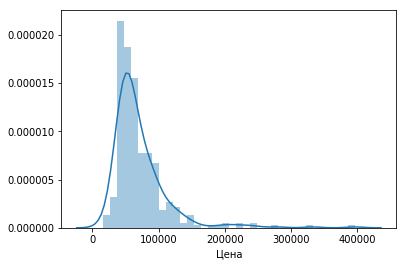

In [47]:
%matplotlib inline
import seaborn as sns

# Распределение квартир по цене:
sns.distplot(df['Цена']);

In [48]:
# Квартир в правой части "хвоста" распределения слишком мало.
# Ограничим выборку только квартирами стоимостью ниже некого порога, скажем 150 тыс у.е.:
df = df[df['Цена'] < 150000]

Позже выяснилось, что среди данных есть также записи, соответствующие комнатам, а не квартирам. Поэтому было решено отбросить записи с ультранизкой ценой. В качестве порога было выбрано значение 30 тыс у.е.:

In [49]:
df[df['Цена'] < 35000]['Описание']

Код объекта
818272    Комната в трехкомнатной квартире в микрорайоне...
822608    Две комнаты в трехкомнатной квартире. Стеклопа...
847586    Однокомнатная квартира в кирпичном доме. Комна...
844689    Дом находится в микрорайоне с хорошо развитой ...
834349     Однокомнатная квартира по привлекательной цен...
836501    Комната 17.6 метра в двухкомнатной квартире с ...
787265    Две комнаты 16 и 8.8 м2 (46/100 доли) в четыре...
777826    27/100 доли в четырёхкомнатной квартире. В пра...
829281    Комната с балконом в трехкомнатной квартире. О...
846239    1-на комнатная квартира на 4-ом этаже 5-ти эта...
830075    Кирпичный дом в Центральном районе. В квартире...
Name: Описание, dtype: object

\- видим, что здесь действительно либо комнаты, либо 'кирпичный дом', что не является целью нашего анализа

In [50]:
# Оставляем только квартиры стоимостью выше порога:
df = df[df['Цена'] > 35000]

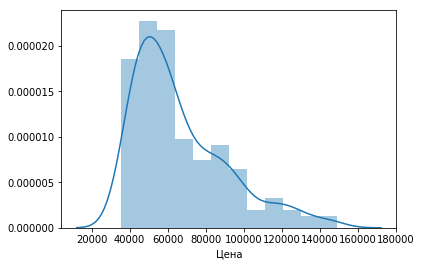

In [51]:
# Распределение квартир теперь выглядит так:
sns.distplot(df['Цена']);

### Этаж/этажность

In [52]:
df[df['Этаж / Этажность'].isnull()]

,Адрес,Балкон,Ближайшее метро,Комнаты,Материал стен,Микрорайон,Описание,Полы,Район,Санузел,Телефон,Тип дома,Условия продажи,Цена,Этаж / Этажность,Лет дому,Лет с момента ремонта,Был капремонт,Общая площадь,Жилая площадь,Площадь кухни
Код объекта,,,,,,,,,,,,,,,,,,,,,
847125,"Одинцова ул., 69",2 лоджии,Каменная горка,1,кирпичный,Не указан,Однокомнатная квартира в кирпичном доме 1995 г...,паркет,Фрунзенский район,раздельный,нет,чешский проект,чистая продажа,52000.0,NaN,23,23,False,43.9,18.3,8.8


Для одной из квартир этаж не указан. Судя из того, что тип дома - чешский, этажей в доме 9. Этаж укажем в середине дома, т.к. судя цене в 52 тыс. он не крайний:

In [53]:
df.loc[df['Этаж / Этажность'].isnull(), 'Этаж / Этажность'] = '5/9'

In [54]:
df.loc[847125]

Адрес                                                     Одинцова ул., 69
Балкон                                                            2 лоджии
Ближайшее метро                                             Каменная горка
Комнаты                                                                  1
Материал стен                                                    кирпичный
Микрорайон                                                       Не указан
Описание                 Однокомнатная квартира в кирпичном доме 1995 г...
Полы                                                                паркет
Район                                                    Фрунзенский район
Санузел                                                         раздельный
Телефон                                                                нет
Тип дома                                                    чешский проект
Условия продажи                                             чистая продажа
Цена                     

In [55]:
df['Этаж'] = df['Этаж / Этажность'].map(lambda x: int(x.split('/')[0]))
df['Этажность'] = df['Этаж / Этажность'].map(lambda x: int(x.split('/')[1]))

In [56]:
df['Этаж'].value_counts()

2     53
5     43
1     36
4     36
3     31
9     24
7     22
6     21
8     19
12     8
10     6
11     6
19     5
18     5
14     3
17     3
16     2
13     1
20     1
Name: Этаж, dtype: int64

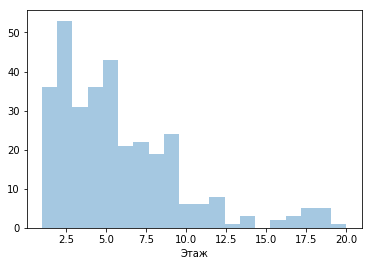

In [57]:
sns.distplot(df['Этаж'], kde=False, bins=20);

\- Преобладают квартиры на нижних этажах по 5й

In [58]:
df['Этажность'].value_counts()

9     128
5      59
12     25
19     25
10     20
4      16
20     10
2       7
7       6
16      5
13      4
14      3
8       3
3       3
11      2
21      2
24      1
15      1
17      1
18      1
6       1
22      1
25      1
Name: Этажность, dtype: int64

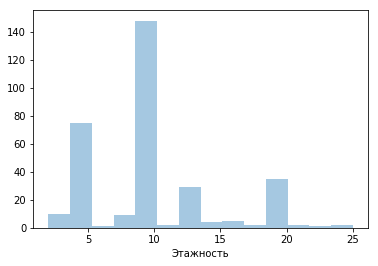

In [59]:
sns.distplot(df['Этажность'], kde=False);

\- больше всего квартир в 9 и 5-этажках

In [60]:
np.median(df['Этаж']), np.median(df['Этажность'])

(5.0, 9.0)

\- т.е. в среднем квартира расположена на 5 этаже 9-этажного дома

In [61]:
df['Первый этаж'] = df['Этаж'].map(lambda x: 1 if x==1 else 0)

In [62]:
df['Первый этаж'].value_counts()

0    289
1     36
Name: Первый этаж, dtype: int64

In [63]:
df['Последний этаж'] = df['Этаж / Этажность'].map(lambda x: 1 if x.split('/')[0] == x.split('/')[1] else 0)

In [64]:
df['Последний этаж'].value_counts()

0    276
1     49
Name: Последний этаж, dtype: int64

In [65]:
# Удаляем столбец 'Этаж / Этажность':
df = df.drop('Этаж / Этажность', axis=1)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325 entries, 842900 to 835358
Data columns (total 24 columns):
Адрес                    325 non-null object
Балкон                   325 non-null object
Ближайшее метро          325 non-null object
Комнаты                  325 non-null int64
Материал стен            325 non-null object
Микрорайон               325 non-null object
Описание                 322 non-null object
Полы                     325 non-null object
Район                    325 non-null object
Санузел                  325 non-null object
Телефон                  325 non-null object
Тип дома                 325 non-null object
Условия продажи          325 non-null object
Цена                     325 non-null float64
Лет дому                 325 non-null int64
Лет с момента ремонта    325 non-null int64
Был капремонт            325 non-null bool
Общая площадь            325 non-null float64
Жилая площадь            325 non-null float64
Площадь кухни            325 non-n

In [67]:
# Формируем вектора X и Y:
X = df.drop({'Цена', 'Описание', 'Адрес'}, axis=1)
Y = df['Цена']

In [68]:
X.shape

(325, 21)

На этом закончим подготовку данных, а начнем собственно

## Обучение модели

In [69]:
# Добавим несколько методов для создания енкодеров:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Добавляет в DataFrame df новый столбец с именем column_name+'_le', содержащий номера категорий, 
# соответствующие столбцу column_name. Исходный столбец column_name удаляется
def encode_with_LabelEncoder(df, column_name):
    label_encoder = LabelEncoder()
    label_encoder.fit(df[column_name])
    df[column_name+'_le'] = label_encoder.transform(df[column_name])
    df.drop([column_name], axis=1, inplace=True)
    return label_encoder

# Кодирование с использованием ранее созданного LabelEncoder
def encode_with_existing_LabelEncoder(df, column_name, label_encoder):
    df[column_name+'_le'] = label_encoder.transform(df[column_name])
    df.drop([column_name], axis=1, inplace=True)

# Вначале кодирует столбец column_name при помощи LabelEncoder, потом добавляет в DataFrame df новые столбцы 
# с именами column_name=<категория_i>. Столбцы column_name и column_name+'_le' удаляются
# Usage: df, label_encoder = encode_with_OneHotEncoder_and_delete_column(df, column_name)
def encode_with_OneHotEncoder_and_delete_column(df, column_name):
    le_encoder = encode_with_LabelEncoder(df, column_name)
    return perform_dummy_coding_and_delete_column(df, column_name, le_encoder), le_encoder

# То же, что предыдущий метод, но при помощи уже существующего LabelEncoder
def encode_with_OneHotEncoder_using_existing_LabelEncoder_and_delete_column(df, column_name, le_encoder):
    encode_with_existing_LabelEncoder(df, column_name, le_encoder)
    return perform_dummy_coding_and_delete_column(df, column_name, le_encoder)

# Реализует Dummy-кодирование
def perform_dummy_coding_and_delete_column(df, column_name, le_encoder):
    oh_encoder = OneHotEncoder(sparse=False)
    oh_features = oh_encoder.fit_transform(df[column_name+'_le'].values.reshape(-1,1))
    ohe_columns=[column_name + '=' + le_encoder.classes_[i] for i in range(oh_features.shape[1])]

    df.drop([column_name+'_le'], axis=1, inplace=True)

    df_with_features = pd.DataFrame(oh_features, columns=ohe_columns)
    df_with_features.index = df.index
    return pd.concat([df, df_with_features], axis=1)

In [70]:
# Кодируем категориальные признаки при помощи Label и Dummy-кодирования:

phone_le_converter = encode_with_LabelEncoder(X, 'Телефон')
X, balcony_le_encoder = encode_with_OneHotEncoder_and_delete_column(X, 'Балкон')
X, metro_le_encoder = encode_with_OneHotEncoder_and_delete_column(X, 'Ближайшее метро')
X, wall_materials_le_encoder = encode_with_OneHotEncoder_and_delete_column(X, 'Материал стен')
X, ground_le_encoder = encode_with_OneHotEncoder_and_delete_column(X, 'Полы')
X, region_le_encoder = encode_with_OneHotEncoder_and_delete_column(X, 'Район')
X, subregion_le_encoder = encode_with_OneHotEncoder_and_delete_column(X, 'Микрорайон')
X, toilet_le_encoder = encode_with_OneHotEncoder_and_delete_column(X, 'Санузел')
X, house_type_le_encoder = encode_with_OneHotEncoder_and_delete_column(X, 'Тип дома')
X, sell_conditions_le_encoder = encode_with_OneHotEncoder_and_delete_column(X, 'Условия продажи')

In [71]:
X.shape

(325, 131)

\- столбцов с признаками хоть и стало более сотни, но еще терпимо

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score

In [80]:
records_count = Y.count()
kf = KFold(n = records_count, n_folds=5, shuffle=True, random_state=1)

In [73]:
# В качестве алгоритма для решения был выбран случайный лес
from sklearn.model_selection import GridSearchCV

def determine_forest_quality(trees_count):
    clf = RandomForestRegressor(n_estimators = trees_count, random_state=1)
    return cross_val_score(clf, X, Y, scoring='r2', cv=kf).mean()

for k in range(1,75,5):
    quality = determine_forest_quality(k)
    print (k, quality)

1 0.520303992138
6 0.784089300212
11 0.776700054531
16 0.776864283639
21 0.784080414907
26 0.786204214288
31 0.789026529922
36 0.787332293668
41 0.788441659103
46 0.78772597695
51 0.790532990526
56 0.789340525149
61 0.78879625273
66 0.787595286351
71 0.790071151795


Уже 6 деревьев дали точность в районе 78%! Решено было выбрать кол-во деревьев равное 51, при котором обеспечивалась точность 79% 

In [74]:
clf = RandomForestRegressor(n_estimators = 51, random_state=1)
clf.fit(X, Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=51, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [75]:
# Определим десятку самых важных признаков:
features = X.columns.values
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

num_to_plot = 10
feature_indices = [ind+1 for ind in indices[:num_to_plot]]

for i in range(num_to_plot):
    print(i, features[feature_indices[i]], round(importances[indices[i]],2))

0 Жилая площадь 0.66
1 Площадь кухни 0.05
2 Район=Заводской район 0.03
3 Материал стен=силикатно-блочный 0.02
4 Этаж 0.02
5 Был капремонт 0.02
6 Микрорайон=Дзержинского, Хмелевского, Щорса 0.02
7 Полы=паркет 0.02
8 Лет с момента ремонта 0.01
9 Первый этаж 0.01


Такие параметры, как 'Жилая площадь', 'Площадь кухни', 'Этаж' и 'Был капремонт' выглядят ожидаемо, 
а вот некоторые из остальных в топ-10 выглядят немного забавно - это 'Заводской район', 'микрорайон=Дзержинского' и 'Материал стен=силикатно-блочный'

In [76]:
# Делаем предсказания:
predictions = pd.Series(clf.predict(X), index=Y.index)

In [77]:
# Интерес представляют записи, для которых модель сильно ошибается в ту или иную сторону
res_info = pd.DataFrame(columns=['Ошибка,%','Ошибка,$','Цена м.кв.'])
for i in Y.index:
    error = Y[i] - predictions[i]
    rel_error = error/predictions[i]*100
    #if np.abs(rel_error)>15:
    res_info.loc[i] = pd.Series({
            'Ошибка,%':round(rel_error,1),
            'Ошибка,$':int(error),
            'Цена м.кв.':int(Y[i]/X['Общая площадь'][i])
    })
    
# Недооцененные квартиры:
res_info.sort_values(by='Ошибка,%')[:5]

,"Ошибка,%","Ошибка,$",Цена м.кв.
845979,-15.6,-9252.0,906.0
838613,-15.4,-7649.0,961.0
806952,-15.1,-9988.0,896.0
830893,-13.7,-10979.0,891.0
798393,-13.1,-13560.0,1232.0


In [78]:
# Переоцененные квартиры:
res_info.sort_values(by='Ошибка,%', ascending=False)[:5]

,"Ошибка,%","Ошибка,$",Цена м.кв.
777692,20.7,23452.0,2242.0
795105,18.1,10582.0,1703.0
843263,16.0,18209.0,1668.0
812051,15.4,15362.0,2065.0
810427,14.9,16735.0,2057.0


Как было сказано ранее, детали можно посмотреть в браузере по адресу http://www.t-s.by/buy/flats/{id}/, где id - код квартиры

Стоит признать, что по сумме факторов данные квартиры выделяются из основной массы

На этом все!
